# SUSS AI-IG Code Along Workshop
# Intermediate Python Workshop: Decision Trees

# **Decision Trees**

## Classification and Regression Trees

### Definition
Classification and Regression Trees (CART) are a set of *supervised* learning models used for problems involving **classification** and **regression**. 

### Python Library: `sklearn.tree`

- Classification: `DecisionTreeClassifier`

- Regression: `DecisionTreeRegressor`

## Decision Tree Classifier

#### Exercise 1: Training your first Classification Tree
Dataset: Wisconsin Breast Cancer Dataset


> https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


We'll predict whether a tumour is **malignant** (cancerous) or **benign** (non-cancerous) based on 2 features: 
1. mean radius of the tumour
2. mean number of concave points

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
"""" Data has already been cleaned """

# import pandas to read dataset
import pandas as pd

In [ ]:
""" Read the dataset """

breastCancer = pd.read_csv('gdrive/My Drive/AIIG-Workshop/breastCancer.csv')
# breastCancer = pd.read_csv('gdrive/My Drive/Colab Notebooks/breastCancer.csv')

In [ ]:
""" Return overview of the dataset """

breastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Some Things to Note: 

1. **Data Exploration** and **Transformation** are always performed before any modelling is carried out. 

2. Dataset is split into **Training** and **Testing sets** (sometimes Validation set, depending on the analytics problem). 


> - this is to ensure that the data that was being used to train the model would not be used to test the model
- unseen data (i.e., testing set) to be used when testing the model, this is to **avoid overfitting** the model


In [ ]:
""" Define the features (inputs) 
    1. mean radius of tumour
    2. mean number of concave points
"""

X = breastCancer[['radius_mean', 'concave points_mean']]

In [ ]:
""" Peek first 5 rows of dataset """

# X.head()
X.head(n=8)   # peeks first 8 rows of dataset

,radius_mean,concave points_mean
0,17.99,0.14710
1,20.57,0.07017
2,19.69,0.12790
3,11.42,0.10520
4,20.29,0.10430
5,12.45,0.08089
6,18.25,0.07400
7,13.71,0.05985


In [ ]:
""" Define the target (output) """

y = breastCancer['diagnosis']

In [ ]:
""" Import relevant python libraries """

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
""" Split data into train-test sets, 80-20 split """

# set random_state to ensure model splits at the same point to ensure more consistent results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
""" 1. Import DecisionTreeClassifier from sklearn.tree """

from sklearn.tree import DecisionTreeClassifier

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

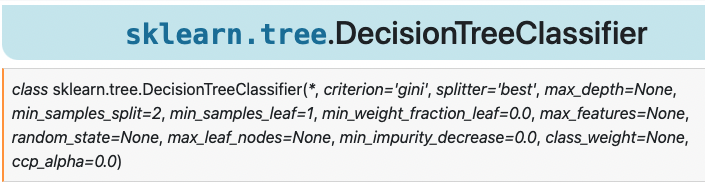

In [ ]:
""" 2. Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6 """

# dt = DecisionTreeClassifier()
dt = DecisionTreeClassifier(max_depth=6)

In [ ]:
""" 3. Fit Decision Tree to the Training set """

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
""" 4. Predict test set labels """

# y_pred is what the trained model PREDICTS to be the output for the test set
y_pred = dt.predict(X_test)
print(y_pred[0:5])  # returns the first 5 results

['B' 'B' 'B' 'M' 'B']


#### Exercise 2: Evaluate the Classification Tree
It's time to evaluate the Classification Tree's performance on the test set.

We will do so using the **accuracy** metric which corresponds to the fraction of **correct predictions** made on the test set. 

In [ ]:
""" 1. Import accuracy_score from sklearn.metrics """

from sklearn.metrics import accuracy_score

In [ ]:
""" 2. Predict the test set labels """

y_pred = dt.predict(X_test)

In [ ]:
""" 3. Compute the acccuracy of the test set """

# comparing the accuracy of the PREDICTED vs ACTUAL test set output
acc = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {acc:.2f}")  # in decimals (2 d.p.)
print(f"Test set accuracy: {acc * 100}%")   # in percentage (2 d.p.)
print(f"Test set accuracy: {acc * 100:.2f}%")

Test set accuracy: 0.89
Test set accuracy: 88.59649122807018%
Test set accuracy: 88.60%


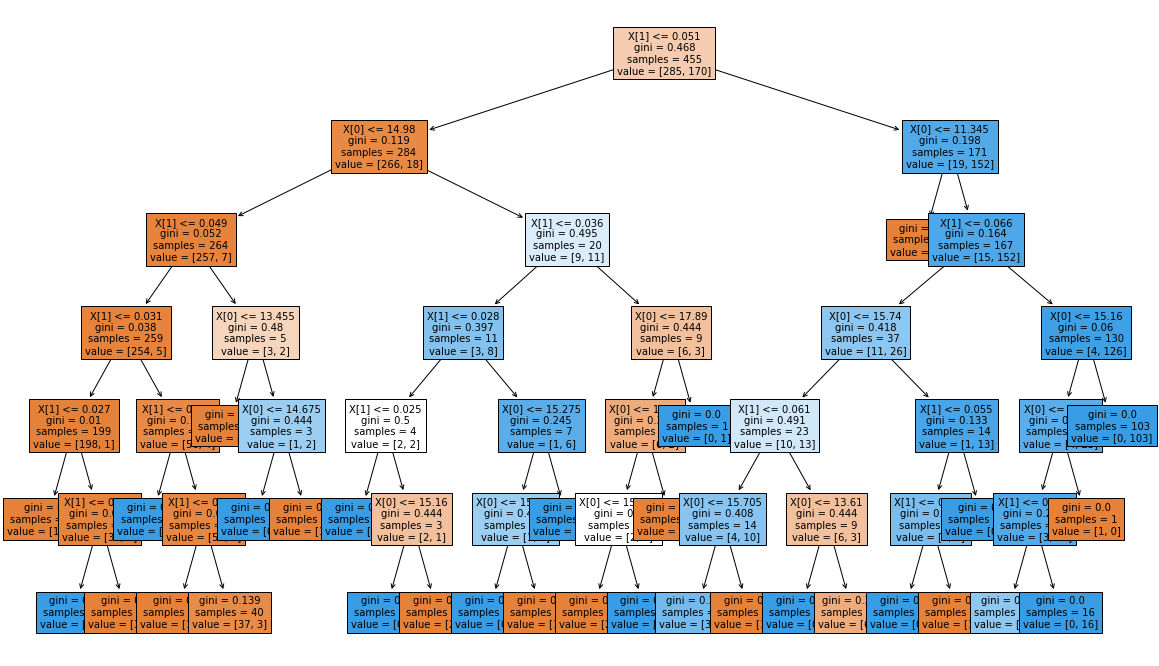

In [ ]:
""" Visualize how the tree is being split """

# 1. Import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree

# 2. Set the size for the visual
plt.figure(figsize=(20,12))

# 3. Plot the tree
tree.plot_tree(dt, filled=True, fontsize=10)

# 4. Show the visual
plt.show()

## Decision Tree Regressor

#### Exercise 1: Training your first Regression Tree
Dataset: Automotive (Miles per gallon) performances of cars


> https://www.kaggle.com/uciml/autompg-dataset


We'll predict the miles-per-gallon (mpg) consumption of a car given 6 different features: 
1. Cylinders (multi-valued discrete)
2. Displacement (continuous)
3. Horsepower (continuous)
4. Weight (continuous)
5. Acceleration (continuous)
6. Model Year (multi-valued discrete)
7. Origin (multi-valued discrete)
8. MPG (continuous)


In [50]:
""" Read the dataset """
automotive = pd.read_csv('gdrive/My Drive/AIIG-Workshop/automotive.csv')
# automotive = pd.read_csv('gdrive/My Drive/Colab Notebooks/automotive.csv')

""" Return overview of the dataset """
automotive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [36]:
# import relevant sklearn libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

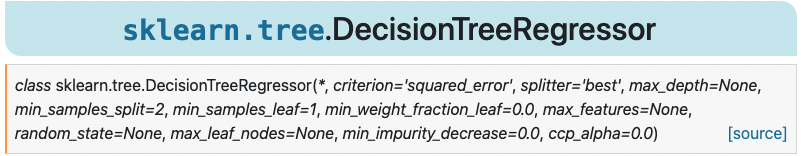

In [37]:
""" Define the features (input) """
X = automotive.drop(columns=['mpg', 'car name'], axis=1)

In [38]:
""" Peek first 5 rows of features """
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [39]:
""" Define the target (output) - miles per gallon or mpg """
y = automotive['mpg']

y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [40]:
""" split dataset into train-test (Train:80%- Test:20%) """

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [41]:
""" 1. Instantiate DecisionTreeRegressor (dtr) with max depth of 8, min_samples_leaf of 0.13 """

dtr = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, criterion='squared_error')

In [42]:
""" 3. Fit Regression Tree to the Training set - put in X_train & y_train""" 

dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13)

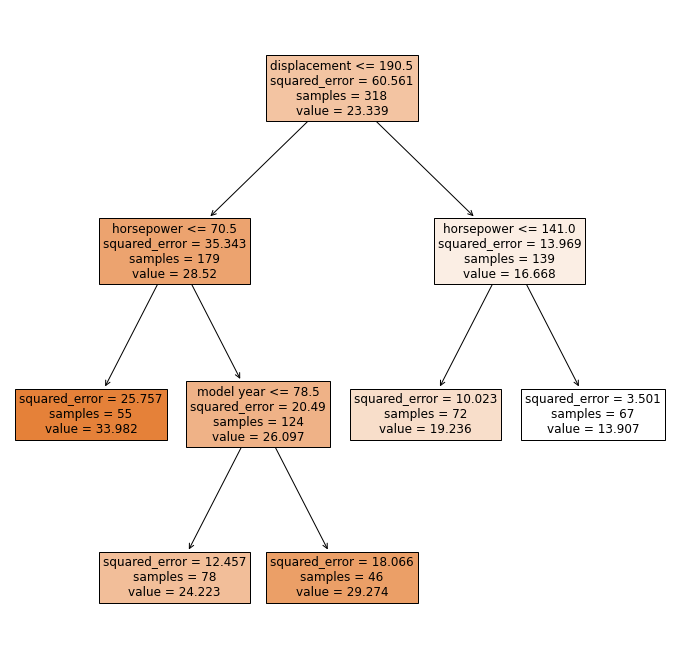

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

""" 4. Visualize how the tree split looks like after fitting on our training set """

feature_names = X.columns[0:6]
plt.figure(figsize=(12, 12))
tree.plot_tree(dtr, filled=True, fontsize=12, feature_names=feature_names)
plt.show()

#### Exercise 2: Evaluate the Regression Tree
It's time to evaluate the Classification Tree's performance on the test set using Root Mean Squared Error (RMSE) metric.

RMSE measures how much the model's predictions differ from the actual labels. 

RMSE can be obtained by computing the square root of the model's Mean Squared Error (MSE). 

In [43]:
""" Compute y_pred """
y_pred = dtr.predict(X_test)

""" Compute Mean Squared Error of dtr """
mse_dtr = MSE(y_test, y_pred)

""" Compute Root Mean Squared Error of dtr """
rmse_dtr = mse_dtr**(1/2)

""" Print output of rmse_str """
print(f"Test set RMSE of dtr: {rmse_dtr:.2f}")

Test set RMSE of dtr: 4.24


value = mean of values for the Y-var at such a leaf node (mean of 55 training samples that ends there)

[Towards Data Science: Decision Trees Explained](https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6)